# **Prologue**

## Overview Final Project dan Expected Output

# **Introducing Libraries and Datasets**

## Library

In [2]:
import warnings
warnings.filterwarnings('ignore')

# ************** DATA MANIPULATION *****************

import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split




# ************* METRICS ****************************

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score




### Loading The Data

In [27]:
# define excel file
excel_files = ["test_1.xlsx", "test_2.xlsx"]

In [28]:
# merged data excel
merged_data = pd.DataFrame()

for file in excel_files:
    data = pd.read_excel(file)
    merged_data = pd.concat([merged_data, data], ignore_index=True)


In [29]:
# merged data test excel to csv
merged_data.to_csv("test_g.csv", index=False)

In [30]:
# merged data csv test
df_te = pd.read_csv('test_g.csv')
df_tr = pd.read_csv('test.csv')
df_t = pd.concat([df_te, df_tr], axis=0).reset_index(drop=True)

In [7]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107095 entries, 0 to 107094
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   hotel                           107095 non-null  object
 1   lead_time                       107095 non-null  object
 2   arrival_date_year               107095 non-null  object
 3   arrival_date_month              107095 non-null  object
 4   arrival_date_week_number        107095 non-null  object
 5   arrival_date_day_of_month       107095 non-null  object
 6   stays_in_weekend_nights         107095 non-null  object
 7   stays_in_week_nights            107095 non-null  object
 8   adults                          107095 non-null  object
 9   children                        107092 non-null  object
 10  babies                          107095 non-null  object
 11  meal                            107095 non-null  object
 12  country                       

In [13]:
df = pd.read_csv('train.csv')

In [ ]:
df.info

<bound method DataFrame.info of                                                    hotel  is_canceled  \
0                        Crystal Cove, Barbados Barbados            0   
1                    Greensboro Courtyard Greensboro, NC            1   
2       The Westin Peachtree Plaza, Atlanta Atlanta, GA             1   
3      Courtyard by Marriott Aberdeen Airport Aberdee...            0   
4                 W New York – Union Square New York, NY            1   
...                                                  ...          ...   
83288                    Crystal Cove, Barbados Barbados            0   
83289              Berlin Marriott Hotel Berlin, Germany            0   
83290               The Ritz-Carlton, Tokyo Tokyo, Japan            0   
83291                     Colony Club, Barbados Barbados            0   
83292                  Las Vegas Marriott Las Vegas, NV             0   

       lead_time  arrival_date_year arrival_date_month  \
0              8               20

### About The Dataset

### Overview of the attributes:




*   `hotel` : Hotel (H1 = Resort Hotel or H2 = City Hotel)
*   `is_canceled` : Value indicating if the booking was canceled (1) or not (0)
*   `lead_time` : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
*   `arrival_date_year` : Year of arrival date
*   `arrival_date_month` : Month of arrival date
*   `arrival_date_week_number` : Week number of year for arrival date
*   `arrival_date_day_of_month : Day of arrival date` :
*   `stays_in_weekend_nights` :  Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
*   `stays_in_week_nights` :  Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
*   `adults` :  Number of adults
*   `children` :  Number of children
*   `babies ` :  Number of babies
*   `meal` : Type of meal booked. Categories are presented in standard hospitality meal packages:
Undefined/SC – no meal package;
BB – Bed & Breakfast;
HB – Half board (breakfast and one other meal – usually dinner);
FB – Full board (breakfast, lunch and dinner)

*   `country ` : Country of origin. Categories are represented in the ISO 3155–3:2013 format
*   `market_segment` : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
*   `distribution_channel` : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
*   `is_repeated_guest` : Value indicating if the booking name was from a repeated guest (1) or not (0)
*   `previous_cancellations` : Number of previous bookings that were cancelled by the customer prior to the current booking
*   `previous_bookings_not_canceled` : Number of previous bookings not cancelled by the customer prior to the current booking
*   `reserved_room_type` : Code of room type reserved. Code is presented instead of designation for anonymity reasons
*   `assigned_room_type` : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons
*   `booking_changes` : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
*   `deposit_type` : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
No Deposit – no deposit was made;
Non Refund – a deposit was made in the value of the total stay cost;
Refundable – a deposit was made with a value under the total cost of stay.

*   `agent` : ID of the travel agency that made the booking
*   `company` : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
*   `days_in_waiting_list` : Number of days the booking was in the waiting list before it was confirmed to the customer
*   `customer_type` : Type of booking, assuming one of four categories:
Contract - when the booking has an allotment or other type of contract associated to it;
Group – when the booking is associated to a group;
Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
Transient-party – when the booking is transient, but is associated to at least other transient booking

*   `adr` : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
*   `required_car_parking_spaces` : Number of car parking spaces required by the customer
*   `total_of_special_requests` : Number of special requests made by the customer (e.g. twin bed or high floor)
*   `reservation_status` : Reservation last status, assuming one of three categories:
Canceled – booking was canceled by the customer;
Check-Out – customer has checked in but already departed;
No-Show – customer did not check-in and did inform the hotel of the reason why

*   `reservation_status_date` : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel




In [ ]:
df.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'bookingID',
       'is_canceled'],
      dtype='object')

In [ ]:
# describe data train
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,83293.0,0.369503,0.482673,0.0,0.00,0.0,1.0,1.0
lead_time,83293.0,103.914230,106.874124,0.0,18.00,69.0,160.0,737.0
arrival_date_year,83293.0,2018.156808,0.706656,2017.0,2018.00,2018.0,2019.0,2019.0
arrival_date_week_number,83293.0,27.164023,13.623752,1.0,16.00,27.0,38.0,53.0
arrival_date_day_of_month,83293.0,15.786116,8.775931,1.0,8.00,16.0,23.0,31.0
stays_in_weekend_nights,83293.0,0.930390,1.004196,0.0,0.00,1.0,2.0,19.0
stays_in_week_nights,83293.0,2.503812,1.924511,0.0,1.00,2.0,3.0,50.0
adults,83293.0,1.854466,0.606139,0.0,2.00,2.0,2.0,55.0
children,83290.0,0.103614,0.398821,0.0,0.00,0.0,0.0,10.0
babies,83293.0,0.008032,0.100641,0.0,0.00,0.0,0.0,10.0


In [ ]:
# describe data test
df_t.describe().T

,count,unique,top,freq
hotel,107095,65,"Waves, Barbados Barbados",1797
lead_time,107095,913,0,4886
arrival_date_year,107095,7,2018,42852
arrival_date_month,107095,13,August,12498
arrival_date_week_number,107095,107,33,2785
arrival_date_day_of_month,107095,63,17,3421
stays_in_weekend_nights,107095,27,0,39531
stays_in_week_nights,107095,51,2,25398
adults,107095,16,2,68456
children,107092.0,9.0,0.0,84060.0


# **Data Preprocessing**

## Missing Value

### In Train data

In [ ]:
#Mengecek Adanya Missing Value
missing = pd.DataFrame({"Missing Value" : df.isnull().sum(), "% Missing Value" : df.isnull().sum()/len(df)*100})
missing[missing["Missing Value"]>0]

,Missing Value,% Missing Value
children,3,0.003602
country,346,0.415401
agent,11404,13.691427
company,78559,94.316449


**Observation** :
- `Children` dan `Country` memiliki missing value yang kurang dari 1%.
- `Children` hanya memiliki missing value yang minim, diasumsikan tidak memiliki anak.
- Karena terliat dibeberapa kolom ada data yang diisi dengan undefined, maka missing value pada `Country` akan diisi oleh undefined juga.
- Karena persentase missing value pada `Company` sangat besar, sehingga kolom akan di drop.
- Karena `agent` cukup banyak, data tersebut akan diisi dengan nilai lain.

In [ ]:
#Mengecek Modus dari country
df["country"].mode()

0    PRT
Name: country, dtype: object

Observation:
1. Terdapat 4 kolom yang memiliki missing value yang harus dihandle dengan cara sebagai berikut:

      *  Kolom children : diisi dengan 0 karena diasumsikan tidak ada children yang stay pada bookingan tersebut

      *  Kolom country : diisi dengan Portugal karena merupakan modus dari country. Selain itu, secara best practice, kolom country seringkali kosong apabila negara asal guest adalah negara dimana hotel berada
      
      *  Kolom agent : diisi dengan 0 karena tidak semua bookingan berasal dari agent (bisa saja berasal dari group, direct, etc), sehingga kolom agent menjadi kosong

      * Kolom company : drop column karena lebih dari 90% kolom company kosong

#### **Handling Missing Value**

#### **Treatment for Missing Values in Company Column**

In [14]:
#menghapus kolom company
df.drop(columns="company",inplace=True)

#### **Treatment for Missing Values in Children Column**

In [15]:
#Mengisi NaN menjadi 0 (diasumsikan tidak memiliki anak)
df["children"]=df["children"].fillna(0)

In [16]:
#Merubah tipe data dari float menjadi int karena manusia pasti berjumlah sebanyak bilangan bulat

df['children'] = df['children'].astype(int)

#### **Treatment for Missing Values in Country Column**

In [17]:
#Mengisi data NaN menjadi Undefined
df["country"]=df["country"].fillna("Undefined")

#### **Treatment for Missing Values in Agent Column**

<Axes: xlabel='agent'>

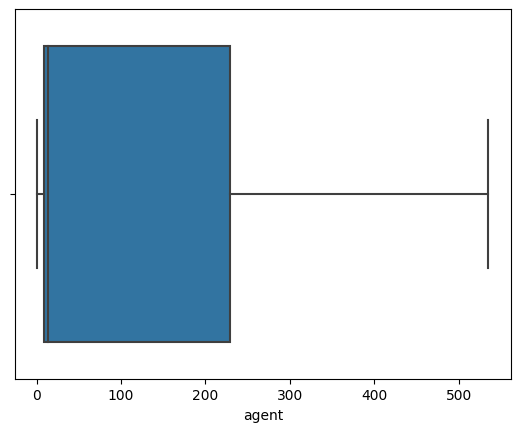

In [18]:
#cek outlier
sns.boxplot(x=df["agent"],data=df)

Karena tidak ada outlier, maka missing values akan diisi dengan nilai mean

In [19]:
#Mengisi NaN dengan mean yang dibulatkan (karena agent adalah ID tidak mungkin desimal)
df["agent"]=df["agent"].fillna(round(df["agent"].mean()))

In [20]:
#Karena agent adalah ID, tidak mungkin desimal
df['agent'] = df['agent'].astype(int)

*Handling Missing Values DONE*

In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

#### Missing Values Kolom adult, children **babies**

In [ ]:
df[((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
1377,Sheraton Grand Rio Hotel & Resort Rio de Janei...,0,37,2018,November,47,17,1,3,0,...,No Deposit,9,0,Transient,97.4,1,1,Check-Out,2018-11-21,1378
1726,Protea Hotel by Marriott Cape Town Sea Point C...,0,31,2018,December,53,27,2,8,0,...,No Deposit,87,0,Transient,28.0,1,0,Check-Out,2019-01-06,1727
1991,Sheraton Mexico City Maria Isabel Hotel Mexico...,0,0,2019,February,9,27,0,0,0,...,No Deposit,85,0,Transient,0.0,0,0,Check-Out,2019-02-27,1992
2036,Baton Rouge Acadian Centre/LSU Area Courtyard ...,0,0,2017,August,33,10,9,20,0,...,No Deposit,87,0,Transient,0.0,0,0,Check-Out,2017-09-08,2037
2401,"Orlando Airport Courtyard Orlando, FL",0,0,2017,December,52,24,0,0,0,...,No Deposit,28,0,Transient,0.0,0,1,Check-Out,2017-12-24,2402


**Jumlah Tamu Dalam Hotel**

Karena dalam proses pemesanan hotel tidak mungkin terjadi jumlah tamu sama dengan nol dari fitur `adults` , `children` dan `babies`. jika terdapat jumlah tamu sama dengan nol maka ada di drop data tersebut,

In [ ]:
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

#### Missing Values kolom stays

**Jumlah malam menginap**

Sama halnya dengan tamu dalam pemesanan hotel tidak mungkin ada jumlah menginap sama dengan nol. jadi data akan di drop jika ada

In [ ]:
df[((df['stays_in_weekend_nights'] == 0) & (df['stays_in_week_nights'] == 0))].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
499,"Berlin Marriott Hotel Berlin, Germany",0,25,2018,March,14,30,0,0,1,...,No Deposit,87,0,Transient,0.0,0,0,Check-Out,2018-03-30,500
627,"The House, Barbados Barbados",0,23,2019,January,2,11,0,0,1,...,No Deposit,9,0,Transient,0.0,0,2,Check-Out,2019-01-11,628
729,Irvine John Wayne Airport/Orange County Courty...,1,29,2018,April,18,30,0,0,2,...,No Deposit,240,0,Transient,0.0,0,1,No-Show,2018-04-30,730
795,Protea Hotel Fire & Ice! by Marriott Johannesb...,0,33,2018,April,16,11,0,0,2,...,No Deposit,171,0,Transient,0.0,0,0,Check-Out,2018-04-11,796
827,"Chicago O'Hare Courtyard Des Plaines, IL",0,0,2018,May,21,17,0,0,1,...,No Deposit,6,0,Transient,0.0,0,0,Check-Out,2018-05-17,828


In [ ]:
df =  df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

### In Test Data

#### Handling Missing Value

In [8]:
#Mengecek Adanya Missing Value
missing = pd.DataFrame({"Missing Value" : df_t.isnull().sum(), "% Missing Value" : df_t.isnull().sum()/len(df_t)*100})
missing[missing["Missing Value"]>0]

,Missing Value,% Missing Value
children,3,0.002801
country,426,0.397778
agent,14775,13.796162
company,100908,94.222886


In [9]:
df_t = df_t[~((df_t['adults'] == 0) & (df_t['children'] == 0) & (df_t['babies'] == 0))]

#### **Treatment for Missing Values in Company Column**

In [62]:
#menghapus kolom company
df_t.drop(columns="company",inplace=True)

#### **Treatment for Missing Values in Children Column**

In [55]:
#Mengisi NaN menjadi 0 (diasumsikan tidak memiliki anak)
df_t["children"]=df_t["children"].fillna(0)

In [56]:
# Menampilkan nilai NaN di kolom 'children'
nan_children = df_t['children'].isna().sum()
print(nan_children)

0


In [57]:
# Menghapus baris dengan nilai NaN di kolom 'children'
df_t.dropna(subset=['children'], inplace=True)

In [60]:
# Menampilkan nilai NaN di kolom 'children'
nan_children = df_t['children'].isna().sum()
print(nan_children)

0


In [59]:
#Merubah tipe data dari float menjadi int karena manusia pasti berjumlah sebanyak bilangan bulat

# Mengubah tipe data kolom 'children' menjadi integer

# Membersihkan kolom 'children' dari nilai yang tidak valid (non-integer)
df_t['children'] = df_t['children'].apply(lambda x: int(x) if str(x).isdigit() else None)

# Mengubah tipe data kolom 'children' menjadi integer
df_t['children'] = df_t['children'].astype(float).astype(pd.Int32Dtype())

In [44]:
df_t['children'].info()


<class 'pandas.core.series.Series'>
Int64Index: 107091 entries, 0 to 107094
Series name: children
Non-Null Count  Dtype
--------------  -----
0 non-null      Int32
dtypes: Int32(1)
memory usage: 1.3 MB


#### **Treatment for Missing Values in Country Column**

In [45]:
#Mengisi data NaN menjadi Undefined
df_t["country"]=df_t["country"].fillna("Undefined")

In [47]:
nan_children = df_t['country'].isna().sum()
print(nan_children)

0


#### **Treatment for Missing Values in Agent Column**

<Axes: xlabel='agent'>

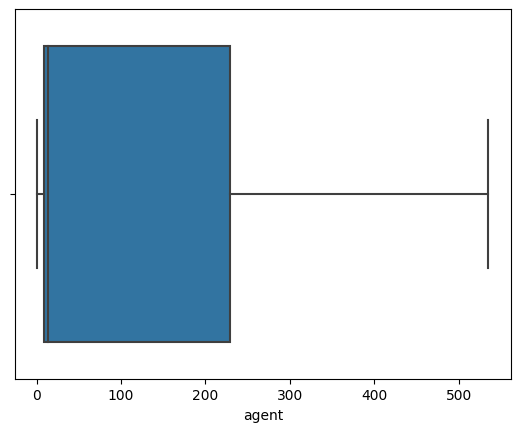

In [50]:
# Mengkonversi kolom 'agent' ke tipe data numerik (jika mungkin)
df_t['agent'] = pd.to_numeric(df_t['agent'], errors='coerce')

# Membuat boxplot dengan orientasi horizontal
sns.boxplot(x=df_t["agent"], data=df_t, orient='h')

Karena tidak ada outlier, maka missing values akan diisi dengan nilai mean

In [51]:
#Mengisi NaN dengan mean yang dibulatkan (karena agent adalah ID tidak mungkin desimal)
df_t["agent"]=df_t["agent"].fillna(round(df_t["agent"].mean()))

In [52]:
#Karena agent adalah ID, tidak mungkin desimal
df_t['agent'] = df_t['agent'].astype(int)

*Handling Missing Values DONE*

In [63]:
df_t.isna().sum()

hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

#### Missing Values Kolom adult, children **babies**

In [64]:
df_t[((df_t['adults'] == 0) & (df_t['children'] == 0) & (df_t['babies'] == 0))].head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
16976,Newark Liberty International Airport Courtyard...,21,2018,August,34,20,2,1,0,0,...,No Deposit,9,0,Transient-Party,109.83,0,2,Check-Out,2018-08-23 00:00:00,89500
16980,Newark Liberty International Airport Courtyard...,147,2018,April,15,4,1,3,0,0,...,No Deposit,9,0,Transient-Party,6.0,0,1,Canceled,2018-03-28 00:00:00,89910
17076,Newark Liberty International Airport Courtyard...,198,2018,July,28,6,0,4,0,0,...,No Deposit,9,0,Transient,0.0,0,1,Check-Out,2018-07-10 00:00:00,104413
17283,Newark Liberty International Airport Courtyard...,310,2019,May,21,24,0,4,0,0,...,No Deposit,9,0,Transient,99.45,0,0,Canceled,2018-08-15 00:00:00,99676
17534,"Orlando Airport Courtyard Orlando, FL",159,2018,July,28,3,5,10,0,0,...,No Deposit,11,0,Transient,0.0,0,1,Check-Out,2018-07-18 00:00:00,93843


**Jumlah Tamu Dalam Hotel**

Karena dalam proses pemesanan hotel tidak mungkin terjadi jumlah tamu sama dengan nol dari fitur `adults` , `children` dan `babies`. jika terdapat jumlah tamu sama dengan nol maka ada di drop data tersebut,

In [65]:
df_t = df_t[~((df_t['adults'] == 0) & (df_t['children'] == 0) & (df_t['babies'] == 0))]

#### Missing Values kolom stays

**Jumlah malam menginap**

Sama halnya dengan tamu dalam pemesanan hotel tidak mungkin ada jumlah menginap sama dengan nol. jadi data akan di drop jika ada

In [66]:
df_t[((df_t['stays_in_weekend_nights'] == 0) & (df_t['stays_in_week_nights'] == 0))].head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
16384,"Mt. Laurel Courtyard Mt. Laurel, NJ",0,2018,June,26,22,0,0,2,0,...,No Deposit,87,0,Transient,0.0,0,1,Check-Out,2018-06-22 00:00:00,85229
16523,"Mt. Laurel Courtyard Mt. Laurel, NJ",13,2018,March,13,24,0,0,2,0,...,No Deposit,242,0,Transient,0.0,0,1,Check-Out,2018-03-24 00:00:00,103272
17206,Newark Liberty International Airport Courtyard...,321,2019,June,26,27,0,0,2,0,...,No Deposit,40,0,Contract,0.0,0,0,Check-Out,2019-06-27 00:00:00,87365
17415,"Orlando Airport Courtyard Orlando, FL",33,2017,October,44,31,0,0,2,0,...,No Deposit,8,0,Transient,0.0,0,1,Check-Out,2017-10-31 00:00:00,96551
17709,"Orlando Airport Courtyard Orlando, FL",1,2018,February,6,6,0,0,1,0,...,No Deposit,9,0,Transient,0.0,0,0,No-Show,2018-02-06 00:00:00,116945


In [67]:
df_t =  df_t[~((df_t['adults'] == 0) & (df_t['children'] == 0) & (df_t['babies'] == 0))]

## Feature Engineer

### Feature Engineer in test data

In [68]:
# new column is_canceled with data 0 and 1 from reservation_status
df_t['is_canceled'] = df_t['reservation_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

In [69]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,No Deposit,314,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,Non Refund,1,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,Non Refund,12,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,No Deposit,87,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,No Deposit,16,0,Transient,57.92,0,1,Canceled,2017-08-24,5


# Data Preparation Modelling

In [ ]:
# Bagian ini adalah contoh untuk melatih model dengan data pelatihan
# X_train adalah fitur dari data pelatihan, y_train adalah target/label
X_train = train_data.drop("target_column_name", axis=1)
y_train = train_data["target_column_name"]

# Bagian ini adalah contoh untuk menguji model dengan data pengujian
# X_test adalah fitur dari data pengujian, y_test adalah target/label
X_test = test_data.drop("target_column_name", axis=1)
y_test = test_data["target_column_name"]

In [ ]:
# Changing the income column into Numerical Value
df['income'].replace({'<=50K': 0, '>50K': 1}, inplace=True)

In [ ]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,Higher Education,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,40,United-States,0
1,50,Self-emp-not-inc,Higher Education,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,High School,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,High School,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Higher Education,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [ ]:
# Changing the Categorical Values to Numerical values using the sklearns Label Encoder

categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,5,6,13,4,0,1,4,1,1,0,40,38,0
1,50,4,6,13,2,3,0,4,1,0,0,13,38,0
2,38,2,5,9,0,5,1,4,1,0,0,40,38,0
3,53,2,5,7,2,5,0,2,1,0,0,40,38,0
4,28,2,6,13,2,9,5,2,0,0,0,40,4,0


# Model Implementation Without Scaling

## Split Data

In [ ]:

features_ = df.drop(columns = ['income'])
target = df['income']
X_train, X_test, y_train, y_test = train_test_split(features_, target, test_size = 0.3,random_state = 0, stratify=target)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (28723, 13)
Test data set size :  (12311, 13)


In [ ]:
y_train.isnull().sum()


0

## Modelling

In [ ]:
cly_sblm = [DecisionTreeClassifier(),
            LogisticRegression(C = 0.5, max_iter = 500),
            GaussianNB(),
            SVC(kernel = 'rbf', max_iter = 1000, probability = True),
            RandomForestClassifier(),
            XGBClassifier(random_state=42)]

df_n = pd.DataFrame(columns = ['Method', 'Recall','Precision', 'F1 Score','AUC','Accuracy'])
df_n

,Method,Recall,Precision,F1 Score,AUC,Accuracy


## Evaluation Score

In [ ]:
for model in cly_sblm:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    method = str(type(model)).split('.')[-1][:-2]

    acc = accuracy_score(y_test, preds)
    auc = roc_auc_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)


    df_n = df_n.append({'Method': method,
                    'Recall': recall,
                    'Precision': precision,
                    'F1 Score': f1,
                    'AUC':auc,
                     'Accuracy': acc},
                     ignore_index=True)

In [ ]:
df_n

,Method,Recall,Precision,F1 Score,AUC,Accuracy
0,DecisionTreeClassifier,0.542830,0.550781,0.546777,0.696366,0.772155
1,LogisticRegression,0.447867,0.683643,0.541190,0.688802,0.807733
2,GaussianNB,0.567854,0.596160,0.581663,0.718721,0.793193
3,SVC,0.964710,0.279331,0.433223,0.560449,0.360897
4,RandomForestClassifier,0.572666,0.656009,0.611511,0.735430,0.815775
5,XGBClassifier,0.611806,0.712099,0.658154,0.763974,0.839087


# Model Implementation With Scaling

##Split Data

In [ ]:

x_s = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age',  'capital.gain', 'capital.loss', 'hours.per.week']]

y_s = df['income']

x_train, x_test, y_train, y_test = train_test_split(x_s, y_s, test_size = 0.3, random_state = 0, stratify=y_s)


In [ ]:
#Using StandardScalar to normalise the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_s = pd.DataFrame(scaler.fit_transform(x_train), columns = x_s.columns)

X_test_s = pd.DataFrame(scaler.transform(x_test), columns = x_s.columns)

##Modelling

In [ ]:
cly_sblm = [DecisionTreeClassifier(),
            LogisticRegression(C = 0.5, max_iter = 500),
            GaussianNB(),
            SVC(kernel = 'rbf', max_iter = 1000, probability = True),
            RandomForestClassifier(),
            XGBClassifier(random_state=42)]

df_s = pd.DataFrame(columns = ['Method', 'Recall','Precision', 'F1 Score','AUC','Accuracy'])
df_s

,Method,Recall,Precision,F1 Score,AUC,Accuracy


## Evaluation Score

In [ ]:
for model in cly_sblm:
    model.fit(X_train_s, y_train)
    preds = model.predict(X_test_s)

    method = str(type(model)).split('.')[-1][:-2]

    acc = accuracy_score(y_test, preds)
    auc = roc_auc_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)



    df_s = df_s.append({'Method': method,
                    'Recall': recall,
                    'Precision': precision,
                    'F1 Score': f1,
                    'AUC':auc,
                     'Accuracy': acc},
                     ignore_index=True)

In [ ]:
df_s

,Method,Recall,Precision,F1 Score,AUC,Accuracy
0,DecisionTreeClassifier,0.532884,0.548366,0.540514,0.692046,0.770612
1,LogisticRegression,0.302534,0.636732,0.410178,0.622009,0.779709
2,GaussianNB,0.544755,0.562624,0.553545,0.700591,0.777516
3,SVC,0.364132,0.363665,0.363899,0.574061,0.677687
4,RandomForestClassifier,0.570741,0.648560,0.607167,0.732945,0.813013
5,XGBClassifier,0.609881,0.717900,0.659497,0.764316,0.840549


The class distribution is IMBALANCE, so need NOT to use accuracy

# Model Implementation With Scalling and Hypertuning Parameter

## Hypertuning using Random search CV

In [ ]:
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for all models
param_grid = {
    'RandomForestClassifier': {
        'n_estimators': [10, 20, 30, 40, 50],
        'max_depth': [1, 2, 3, 4, 5],
    },

    'XGBoost': {
    'n_estimators': [10,20,30,40,50],
    'max_depth':[1,2,3,4,5],

    },

    'DecisionTreeClassifier': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'LogisticRegression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'max_iter': [100, 500, 1000],
    },
    'GaussianNB': {
        'priors': [
            [0.7, 0.3],
            [0.8, 0.2],
            [0.6, 0.4],
        ]
    },
    'SVC': {
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'class_weight': ['balanced', None],
    }
}

# Create an empty dictionary to store the best estimators
best_estimators = {}


# Loop through each model and perform RandomizedSearchCV
for model_name, param_values in param_grid.items():
    if model_name == 'RandomForestClassifier':
        clf = RandomForestClassifier(random_state=42)
    elif model_name == 'XGBoost':
        clf = XGBClassifier(random_state=42)
    elif model_name == 'DecisionTreeClassifier':
        clf = DecisionTreeClassifier()
    elif model_name == 'LogisticRegression':
        clf = LogisticRegression(C = 0.5, max_iter = 500)
    elif model_name == 'GaussianNB':
        clf = GaussianNB()
    elif model_name == 'SVC':
        clf = SVC(kernel = 'rbf', max_iter = 1000, probability = True)

    random_cv = RandomizedSearchCV(clf, param_values, cv=5, scoring='recall', n_iter=10)
    random_cv.fit(X_train_s, y_train)
    best_estimators[model_name] = random_cv.best_estimator_




In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test_s)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

## Evaluating Score

In [ ]:
models = ['RandomForestClassifier', 'LogisticRegression','XGBoost',
          'DecisionTreeClassifier','GaussianNB', 'SVC' ]

eval_df = pd.DataFrame(columns=['Model', 'Recall Train', 'Recall Test',
                                'Precision Train', 'Precision Test',
                                'F1 Score Train', 'F1 Score Test',
                                'AUC Train', 'AUC Test' ])
for i in models:
  best_model = best_estimators[i]
  y_pred_train = best_model.predict(X_train_s)
  y_pred_test = best_model.predict(X_test_s)

  recall_train = recall_score(y_train, y_pred_train)
  recall_test = recall_score(y_test, y_pred_test)

  precision_train =  precision_score(y_train, y_pred_train)
  precision_test =  precision_score(y_test, y_pred_test)

  F1_train =  f1_score(y_train, y_pred_train)
  F1_test =  f1_score(y_test, y_pred_test)

  AUC_train = roc_auc_score(y_train, y_pred_train)
  AUC_test = roc_auc_score(y_test, y_pred_test)


  eval_df = eval_df.append({'Model':i, 'Recall Train':recall_train, 'Recall Test':recall_test,
                            'Precision Train':precision_train, 'Precision Test': precision_test,
                           'F1 Score Train': F1_train, 'F1 Score Test':F1_test,
                            'AUC Train':AUC_train, 'AUC Test':AUC_test},  ignore_index=True)

eval_df

,Model,Recall Train,Recall Test,Precision Train,Precision Test,F1 Score Train,F1 Score Test,AUC Train,AUC Test
0,RandomForestClassifier,0.470232,0.468078,0.736910,0.745910,0.574114,0.575202,0.706655,0.707011
1,LogisticRegression,0.314588,0.302534,0.644144,0.636732,0.422725,0.410178,0.627830,0.622009
2,XGBoost,0.639214,0.614694,0.746947,0.725758,0.688894,0.665624,0.782893,0.767973
3,DecisionTreeClassifier,0.787845,0.564325,0.877489,0.622655,0.830254,0.592057,0.875275,0.724190
4,GaussianNB,0.717586,0.706449,0.517296,0.514486,0.601198,0.595377,0.745273,0.740216
5,SVC,1.000000,1.000000,0.253212,0.253188,0.404100,0.404071,0.500000,0.500000


# Model Implementation Without Scalling but Hypertuning

## Hypertuning using Random search CV

In [ ]:
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for all models
param_grid = {
    'RandomForestClassifier': {
        'n_estimators': [10, 20, 30, 40, 50],
        'max_depth': [1, 2, 3, 4, 5],
    },

    'XGBoost': {
    'n_estimators': [10,20,30,40,50],
    'max_depth':[1,2,3,4,5],

    },

    'DecisionTreeClassifier': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'LogisticRegression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'max_iter': [100, 500, 1000],
    },
    'GaussianNB': {
        'priors': [
            [0.7, 0.3],
            [0.8, 0.2],
            [0.6, 0.4],
        ]
    },
    'SVC': {
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'class_weight': ['balanced', None],
    }
}

# Create an empty dictionary to store the best estimators
best_estimators = {}


# Loop through each model and perform RandomizedSearchCV
for model_name, param_values in param_grid.items():
    if model_name == 'RandomForestClassifier':
        clf = RandomForestClassifier(random_state=42)
    elif model_name == 'XGBoost':
        clf = XGBClassifier(random_state=42)
    elif model_name == 'DecisionTreeClassifier':
        clf = DecisionTreeClassifier()
    elif model_name == 'LogisticRegression':
        clf = LogisticRegression(C = 0.5, max_iter = 500)
    elif model_name == 'GaussianNB':
        clf = GaussianNB()
    elif model_name == 'SVC':
        clf = SVC(kernel = 'rbf', max_iter = 1000, probability = True)

    random_cv = RandomizedSearchCV(clf, param_values, cv=5, scoring='recall', n_iter=10)
    random_cv.fit(X_train, y_train)
    best_estimators[model_name] = random_cv.best_estimator_




## Evaluating Score

In [ ]:
models = ['RandomForestClassifier', 'LogisticRegression','XGBoost',
          'DecisionTreeClassifier','GaussianNB', 'SVC' ]

eval_df = pd.DataFrame(columns=['Model', 'Recall Train', 'Recall Test',
                                'Precision Train', 'Precision Test',
                                'F1 Score Train', 'F1 Score Test',
                                'AUC Train', 'AUC Test' ])
for i in models:
  best_model = best_estimators[i]
  y_pred_train = best_model.predict(X_train)
  y_pred_test = best_model.predict(X_test)

  recall_train = recall_score(y_train, y_pred_train)
  recall_test = recall_score(y_test, y_pred_test)

  precision_train =  precision_score(y_train, y_pred_train)
  precision_test =  precision_score(y_test, y_pred_test)

  F1_train =  f1_score(y_train, y_pred_train)
  F1_test =  f1_score(y_test, y_pred_test)

  AUC_train = roc_auc_score(y_train, y_pred_train)
  AUC_test = roc_auc_score(y_test, y_pred_test)


  eval_df = eval_df.append({'Model':i, 'Recall Train':recall_train, 'Recall Test':recall_test,
                            'Precision Train':precision_train, 'Precision Test': precision_test,
                           'F1 Score Train': F1_train, 'F1 Score Test':F1_test,
                            'AUC Train':AUC_train, 'AUC Test':AUC_test}, ignore_index=True)

eval_df

,Model,Recall Train,Recall Test,Precision Train,Precision Test,F1 Score Train,F1 Score Test,AUC Train,AUC Test
0,RandomForestClassifier,0.473532,0.473211,0.731832,0.743448,0.575006,0.578318,0.707349,0.708925
1,LogisticRegression,0.454970,0.449150,0.680444,0.682594,0.545320,0.541796,0.691261,0.689171
2,XGBoost,0.629176,0.606994,0.742857,0.730220,0.681307,0.662929,0.777665,0.765483
3,DecisionTreeClassifier,0.651451,0.559833,0.767412,0.667049,0.704692,0.608756,0.792252,0.732549
4,GaussianNB,0.700399,0.685595,0.556843,0.558839,0.620425,0.615761,0.755701,0.751053
5,SVC,1.000000,1.000000,0.253212,0.253188,0.404100,0.404071,0.500000,0.500000


# Feature importance

In [ ]:
# Plotting the feature importances using the Boosted Gradient Descent setelah tren model terbaik
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:

# Training the model
model = XGBClassifier()
model_importance = model.fit(X_train_s, y_train)




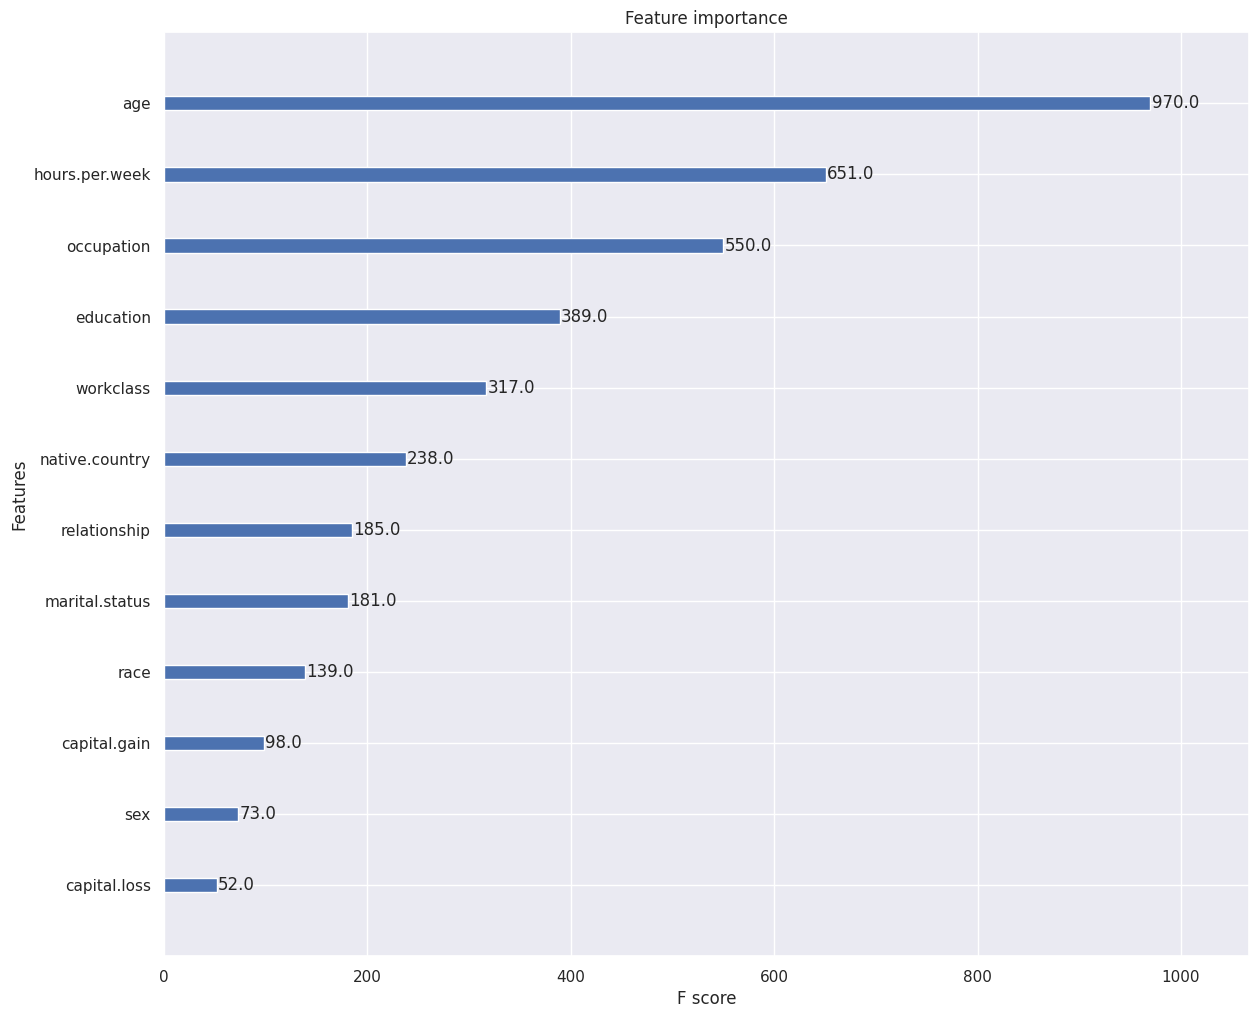

In [ ]:
# Plotting the Feature importance bar graph
plt.rcParams['figure.figsize'] = [14,12]
sns.set(style = 'darkgrid')
plot_importance(model_importance);

# Summary and Conclusion: </h1>



1. Penargetan Iklan: Jika Anda memiliki produk atau layanan tertentu yang lebih cocok untuk kelompok dengan pendapatan tinggi, Anda dapat menggunakan informasi ini untuk menargetkan iklan Anda kepada mereka.

2. Analisis Faktor-Faktor Pengaruh: Anda dapat melakukan analisis lebih lanjut untuk memahami faktor-faktor apa yang paling mempengaruhi pendapatan seseorang. Hal ini dapat membantu dalam perencanaan pengembangan keterampilan atau pelatihan karyawan, misalnya.

3. Penyusunan Gaji dan Penghargaan Karyawan: Jika Anda adalah seorang HR atau manajer yang berhubungan dengan gaji, Anda dapat menggunakan informasi ini untuk membantu menetapkan gaji dan insentif yang lebih sesuai dengan profil karyawan.

4. Analisis Kepuasan Karyawan: Anda dapat membandingkan pendapatan karyawan dengan tingkat kepuasan mereka untuk melihat apakah ada korelasi antara pendapatan dan kebahagiaan di tempat kerja.

5. Analisis Kualifikasi Pendidikan: Anda dapat melihat apakah ada hubungan antara pendidikan tertentu dan penghasilan yang lebih tinggi. Hal ini dapat membantu dalam pengembangan program pendidikan atau pelatihan.

6. Pengelolaan Sumber Daya Manusia: Jika Anda adalah HR atau manajer, Anda dapat menggunakan informasi ini untuk mengelola pengembangan karir dan promosi karyawan dengan lebih baik.

7. Evaluasi Kebijakan Pemerintah: Informasi tentang pendapatan dapat digunakan oleh pemerintah untuk mengevaluasi efektivitas program bantuan atau kebijakan ekonomi.

8. Analisis Keseimbangan Kehidupan Kerja: Anda dapat membandingkan pendapatan dengan waktu kerja dan tingkat stres untuk memahami keseimbangan antara kehidupan kerja dan kehidupan pribadi karyawan.

9. Perencanaan Keuangan Individu: Jika Anda adalah penasihat keuangan, Anda dapat menggunakan informasi ini untuk membantu klien Anda merencanakan keuangan mereka, seperti menentukan berapa banyak yang harus mereka tabung atau investasikan

In [ ]:
model , recall train, recall test, precision train, precision test, f1 score train, f1 score test
log 0, 8 0.79 ini paling bagus modelnya karena perubahannya sedikit. jangan patokan paling besar scorenya aja. tapi harus stabil
random 0.9  0.8
xgb 1 0.9